<a href="https://colab.research.google.com/github/Melisa7L/PPS/blob/main/PPS_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan las librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

Cargo el dataset de las noticias

In [5]:
# Lectura del excel
from google.colab import drive
drive.mount('/gdrive')
# Ruta del archivo en Google Drive
ruta = "/gdrive/My Drive/Limpieza/Data_Completo_Limpio.xlsx"
columns_names = ['fecha_noticia','titulo_noticia','texto_noticia','longitud_noticia','categoria']
# Se carga el archivo Excel en un DataFrame de pandas
df = pd.read_excel(ruta)

Mounted at /gdrive


In [6]:
# Visualizacion del DataFrame
df.head()

,fecha_noticia,titulo_noticia,texto_noticia,longitud_noticia,categoria
0,2023-05-03T12:00:00Z,El debate de la ética de la IA no es tecnológi...,Facebook\nTwitter\nImprimir\nCorreo electrónic...,16533,ciencia_tecnologia
1,2023-09-01 13:16:41,Presidencia de la Nación,Hasta el 22 de septiembre las instituciones po...,3079,ciencia_tecnologia
2,Fecha no encontrada,Investigadores identifican 574 especies exótic...,"Menú Abonados ALICANTE, 27 Jun. (EUROPA PRESS)...",3389,ciencia_tecnologia
3,Fecha no encontrada,Datos de una antigua misión permiten mapear el...,Menú Abonados Datos adquiridos durante la pasa...,3731,ciencia_tecnologia
4,Fecha no encontrada,Dos llamativas nuevas plantas carnívoras descr...,Menú Abonados Dos nuevas especies de plantas c...,4378,ciencia_tecnologia


In [7]:
# Visualizacion del shape del DF
df.shape

(28276, 5)

In [8]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276 entries, 0 to 28275
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_noticia     28276 non-null  object
 1   titulo_noticia    28276 non-null  object
 2   texto_noticia     28276 non-null  object
 3   longitud_noticia  28276 non-null  int64 
 4   categoria         28276 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


Hay 5 variables en el conjunto de datos, donde 4 son del tipo categorica y una del tipo entero.
•La variable categoria categoria es el objetivo del análisis.

In [9]:
# Vereificamos valores missings
df.isnull().sum()

fecha_noticia       0
titulo_noticia      0
texto_noticia       0
longitud_noticia    0
categoria           0
dtype: int64

Data pre-processing
Drop duplicates
Se saca los datos duplicados en el dataset

In [10]:
df.drop_duplicates()

,fecha_noticia,titulo_noticia,texto_noticia,longitud_noticia,categoria
0,2023-05-03T12:00:00Z,El debate de la ética de la IA no es tecnológi...,Facebook\nTwitter\nImprimir\nCorreo electrónic...,16533,ciencia_tecnologia
1,2023-09-01 13:16:41,Presidencia de la Nación,Hasta el 22 de septiembre las instituciones po...,3079,ciencia_tecnologia
2,Fecha no encontrada,Investigadores identifican 574 especies exótic...,"Menú Abonados ALICANTE, 27 Jun. (EUROPA PRESS)...",3389,ciencia_tecnologia
3,Fecha no encontrada,Datos de una antigua misión permiten mapear el...,Menú Abonados Datos adquiridos durante la pasa...,3731,ciencia_tecnologia
4,Fecha no encontrada,Dos llamativas nuevas plantas carnívoras descr...,Menú Abonados Dos nuevas especies de plantas c...,4378,ciencia_tecnologia
...,...,...,...,...,...
28271,2023-01-29,"El doctor que comió heces de sus pacientes, ha...","Joseph Goldberger (1874-1929), médico y epidem...",10362,salud
28272,2023-03-28,"""Tuve covid hace tres años y aún no puedo hace...","Lucy Adams todavía sufre de vértigo, dolor de ...",10458,salud
28273,2023-03-17,Los médicos que dan falsas esperanzas a pacien...,Más de dos millones de personas en el mundo ti...,9700,salud
28274,2023-03-21,"Síndrome de Down: ""El problema no es el niño (...",Otis cumple 2 años esta semana. La fecha de na...,8844,salud


Distribución de frecuencia y proprocion de las variables

In [11]:
# Funcion conteo y proporcion de datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist

In [12]:
# Ver el conteo y la proporción de Class
for i in columns_names:
    print(' '*4,i.upper())
    print(dist(df,i))
    print("*"*300)

     FECHA_NOTICIA
                               Freq[N]  Prop[%]
Fecha no encontrada               7805    0.276
Martes, 24 de Octubre de 2023       87    0.003
16 de octubre de 2023               16    0.001
15 de octubre de 2023               13    0.000
2023-01-31                          13    0.000
...                                ...      ...
2016-02-11T03:00:00.000Z             1    0.000
2016-08-10T03:00:00.000Z             1    0.000
2017-06-06T03:00:00.000Z             1    0.000
2016-02-14T03:00:00.000Z             1    0.000
2018-04-30                           1    0.000

[16823 rows x 2 columns]
************************************************************************************************************************************************************************************************************************************************************************************************************
     TITULO_NOTICIA
                                                    Freq[N

Análisis exploratorio de datos

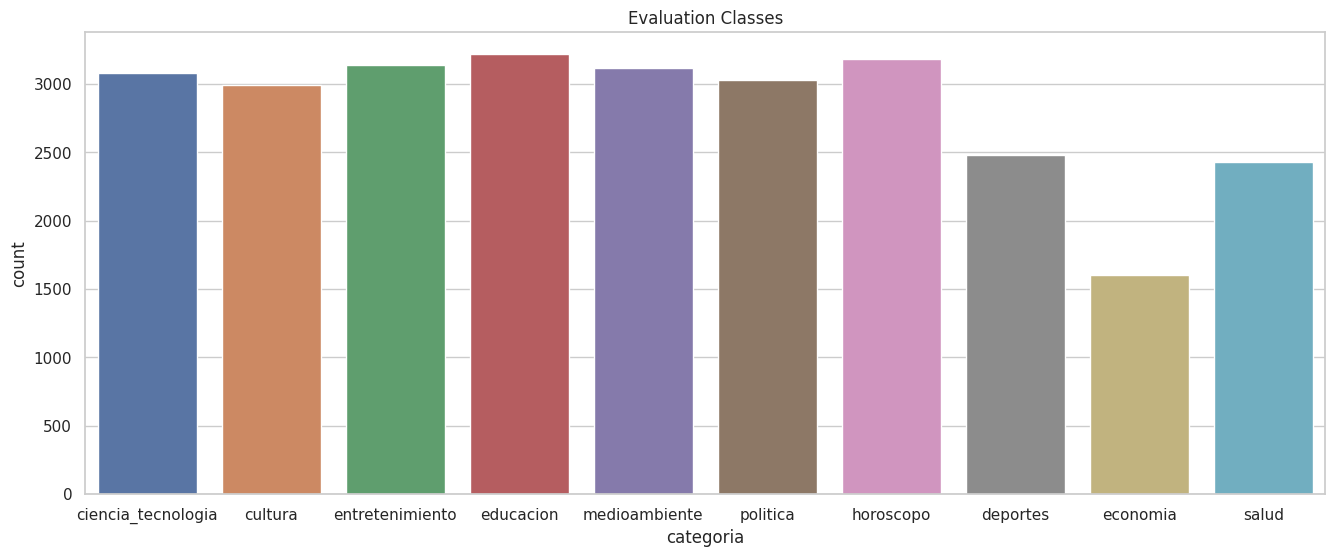

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df_car es tu DataFrame con los datos
# y 'Class' es la columna categórica que deseas explorar

# Graficamos la variable 'Class' separada por la primera columna en tu conjunto de datos
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(data=df, x='categoria', ax=ax)
ax.set_title("Evaluation Classes")
plt.show()


In [14]:
print(df.columns)
print(df['categoria'].dtype)


Index(['fecha_noticia', 'titulo_noticia', 'texto_noticia', 'longitud_noticia',
       'categoria'],
      dtype='object')
object


INGENIERIA DE CARACTERISTICAS


Submuestreo

In [15]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

Declarando variables predictoras y variable objetivo

In [16]:
# Separamos datos por X e Y
X_ = df.drop('categoria',axis=1)
y_ = df.categoria

In [17]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


In [18]:
#!pip install category_encoders
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=columns_names[:-1])

X_ = encoder.fit_transform(X_)

In [19]:
X_.head()

,fecha_noticia,titulo_noticia,texto_noticia,longitud_noticia
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,3,4,4,4
4,3,5,5,5


In [20]:
X_.dtypes

fecha_noticia       int64
titulo_noticia      int64
texto_noticia       int64
longitud_noticia    int64
dtype: object

Entrenamiento y prueba de datos

In [21]:
from sklearn.model_selection import train_test_split

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.3, random_state=42)

In [22]:
print('X:',X_.shape, X_.shape)
print('y:',y_.shape, y_.shape)

X: (28276, 4) (28276, 4)
y: (28276,) (28276,)


Entrenamiento del modelo

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Instancia del modelo
tree_ = DecisionTreeClassifier(random_state=42)

Optimización de parámetros


In [24]:
from sklearn.model_selection import GridSearchCV

# parametros del decision tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

In [25]:
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_, y_)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.9147653411811444


In [26]:
# Modelo decision tree con parametros optimizados
best_tree_ = grid_search.best_estimator_

In [27]:
# Predecimos Y
y_train_pred_tree_ = best_tree_.predict(X_train_)
y_test_pred_tree_= best_tree_.predict(X_test_)

Evaluacion del modelo

In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Calculo el accuract en train
train_acc = accuracy_score(y_true=y_test_,y_pred=y_test_pred_tree_)
# Calculo el accuract en test
test_acc  = accuracy_score(y_true=y_train_,y_pred=y_train_pred_tree_)

In [30]:
print("El accuracy en train es:",train_acc)
print("El accuracy en test es:",test_acc)

El accuracy en train es: 0.9952846870211011
El accuracy en test es: 0.9942909109281058


La precisión en los conjuntos de datos de entrenamiento y prueba están muy cercanas, lo que sugiere que el modelo no está sufriendo de sobreajuste.

In [31]:
print(classification_report(y_test_,y_test_pred_tree_))


                    precision    recall  f1-score   support

ciencia_tecnologia       1.00      1.00      1.00       924
           cultura       0.96      1.00      0.98       879
          deportes       1.00      1.00      1.00       741
          economia       1.00      0.97      0.99       481
         educacion       1.00      1.00      1.00       994
   entretenimiento       1.00      1.00      1.00       950
         horoscopo       1.00      1.00      1.00       996
     medioambiente       1.00      0.99      1.00       938
          politica       1.00      1.00      1.00       862
             salud       1.00      0.97      0.99       718

          accuracy                           1.00      8483
         macro avg       1.00      0.99      0.99      8483
      weighted avg       1.00      1.00      1.00      8483



Podemos observar que el f1-score del atributo 'cultura' un poco mas bajo, los demas son todos valores altos. Esto sugiere que el modelo tiene dificultades para clasificar correctamente las clase 'cultura' ,'economia' y 'salud'.

El f1-score promedio general es de 1.00, lo cual indica que el modelo tiene un buen rendimiento general en la clasificación de las distintas clases.

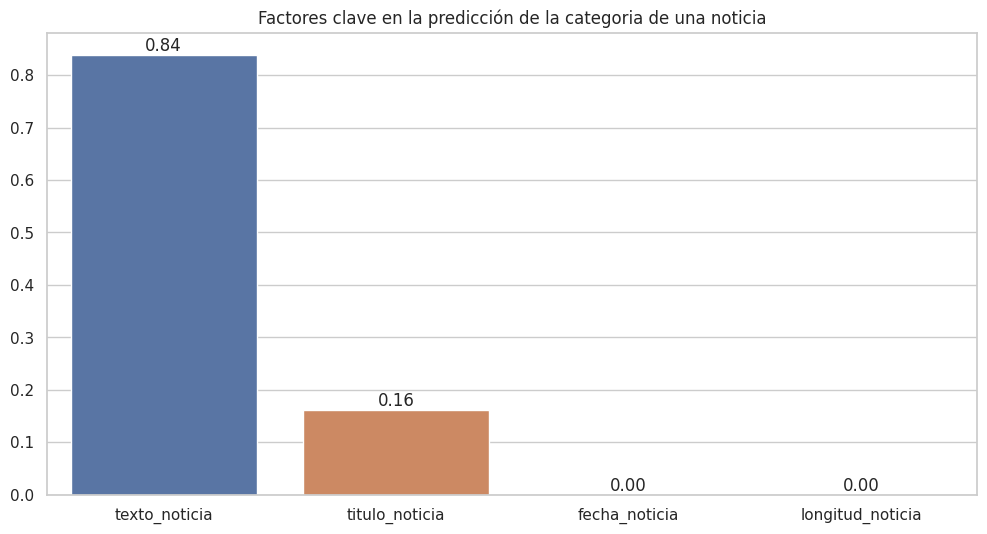

,0
texto_noticia,0.839060
titulo_noticia,0.160834
fecha_noticia,0.000106
longitud_noticia,0.000000


In [32]:
feature_scores_car = pd.DataFrame(pd.Series(best_tree_.feature_importances_, index=X_train_.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la categoria de una noticia")
plt.show()
pd.DataFrame(feature_scores_car.T)

El texto_noticia y el titulo_noticia son factores cruciales en la determinación de su clasificación.


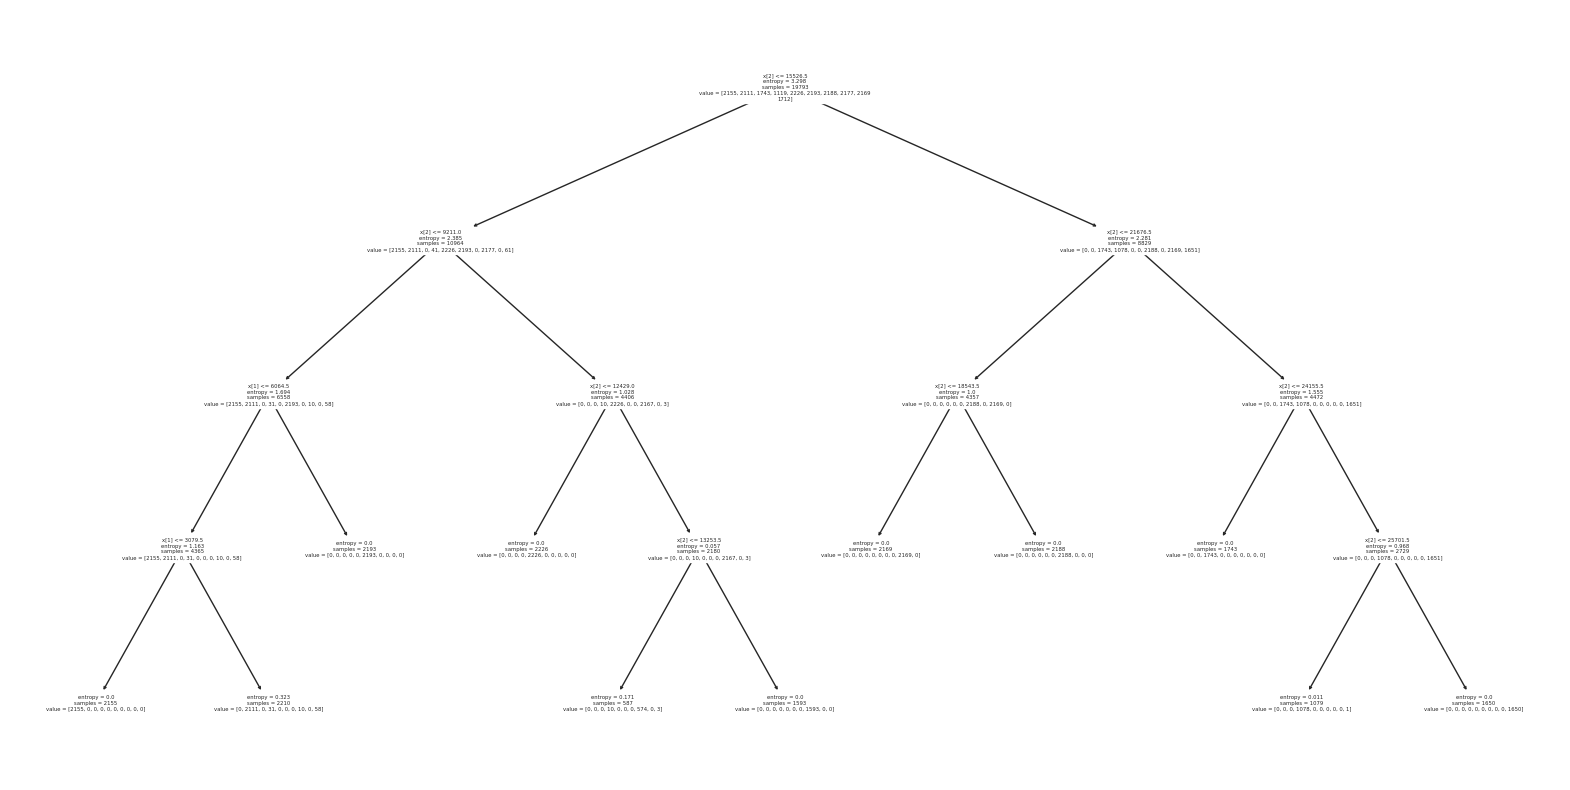

In [34]:
plt.figure(figsize = (20,10))
from sklearn import tree

tree.plot_tree(best_tree_.fit(X_train_, y_train_));